# (STA 380) Introduction to Machine Learning, Part 2: Exercises
Names: Neal Makwana, Quinlan O'Connell, Ashley Hattendorf, and Maru Lasala

# Question 1: Probability practice

### Part A

Using the rule of total probability:

    P(Y) = P(Y∣RC)⋅P(RC) + P(Y∣TC)⋅P(TC)

Substitute the known values:

    0.65 = 0.5⋅0.3 + P(Y∣TC)⋅0.7

Solving for P(Y∣TC):

    0.65 = 0.15 + 0.7⋅P(Y∣TC)

    0.65 − 0.15 = 0.7⋅P(Y∣TC)

    0.5 = 0.7⋅P(Y∣TC)

    P(Y∣TC) = 0.5/0.7

    P(Y∣TC) ≈ 0.7143

Therefore, the fraction of Truthful Clickers who answered "Yes" is approximately 0.7143 or 71.43%.

### Part B

TP = Tests positive

TN = Tests negative

D = Has disease

ND = Doesn't have disease


    P(TP|D) = 0.993
    P(D) = 0.000025

    P(TP|ND) = 1 - 0.9999 = 0.0001
    P(ND) = 1 - 0.000025 = 0.999975

    P(TP) = (0.993 * 0.000025) + (0.0001 * 0.99975)
    P(TP) = 0.00002482 + 0.0000999975 = 0.0001248175

    P(D|TP) = (0.993 * 0.000025) / 0.0001248175 = 0.19889

Therefore, the probability that a person has the disease given that they test positive is approximately 0.19889 or 19.89%

# Question 2: Wrangling the Billboard Top 100

Check R Code File

# Question 3: Visual story telling part 1: green buildings


Median Rent for Green Buildings: 27.6
Median Rent for Non-Green Buildings: 25.03


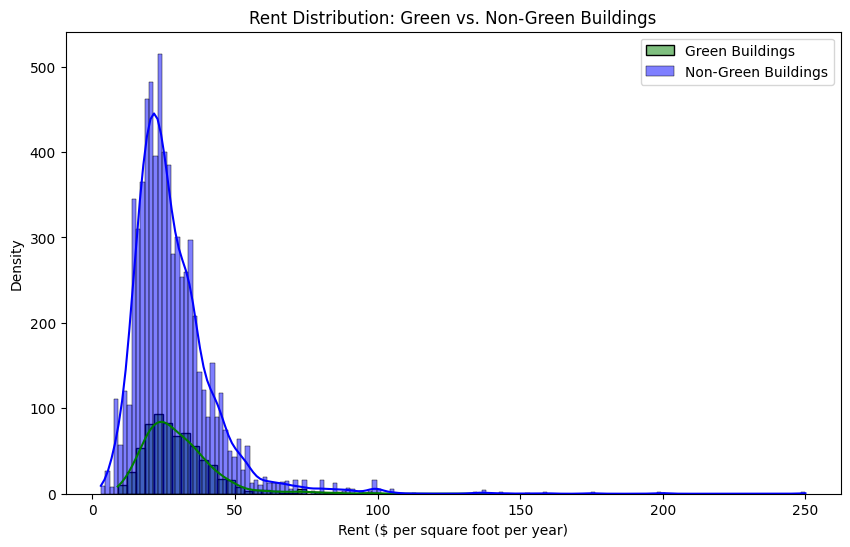

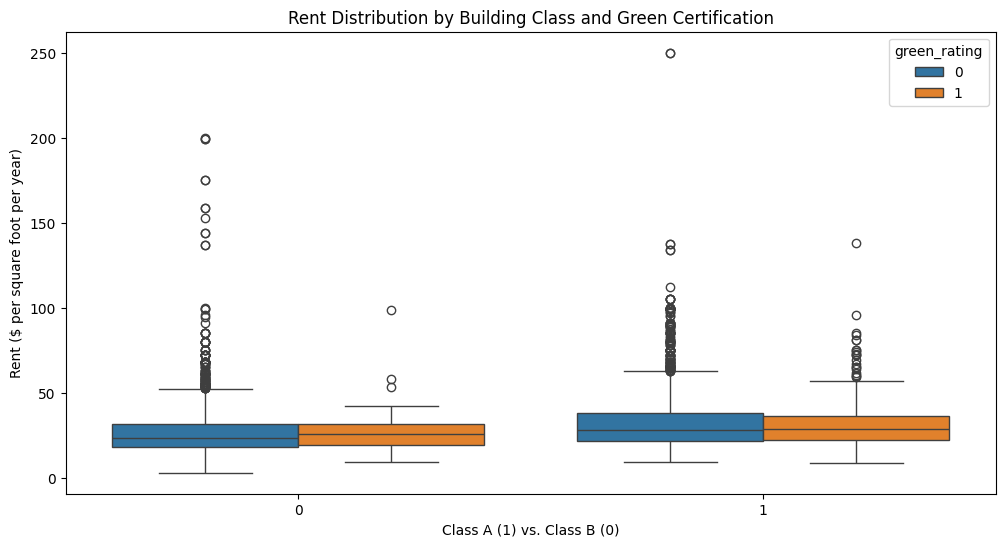

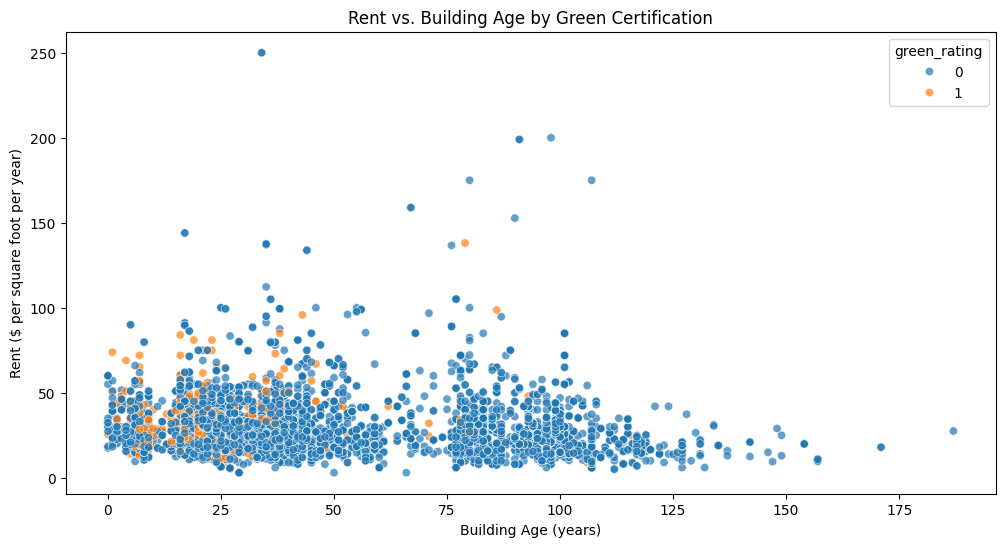

<ipython-input-10-8497ee6cec6b>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



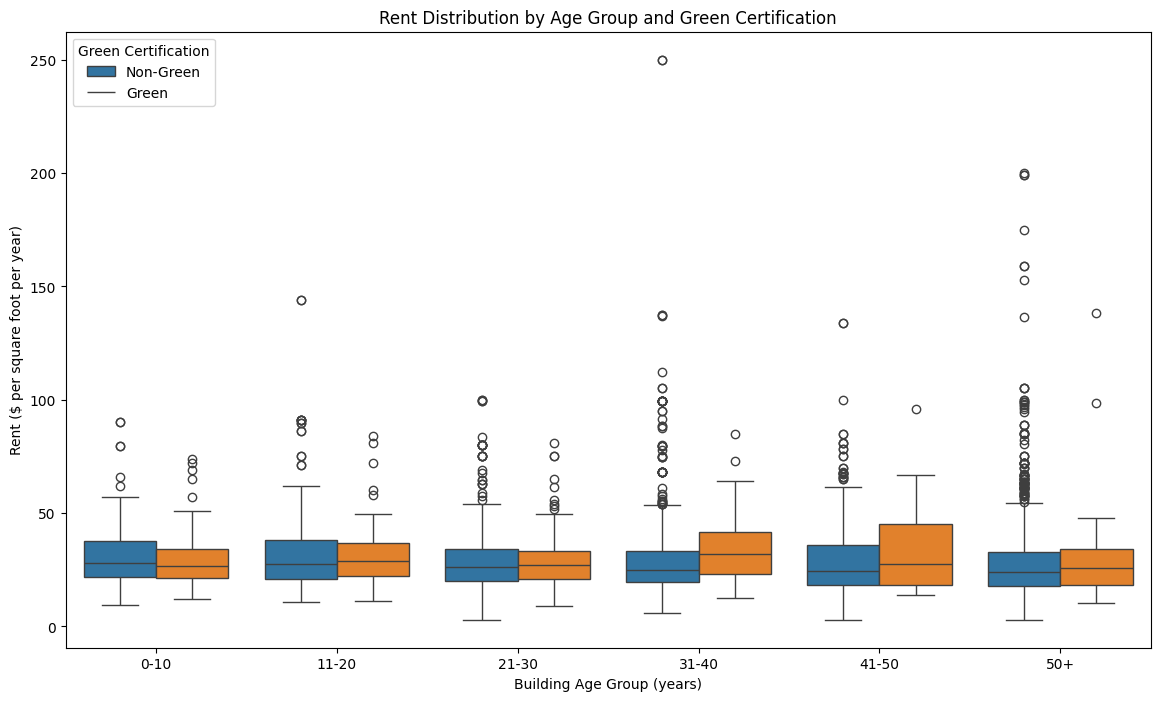

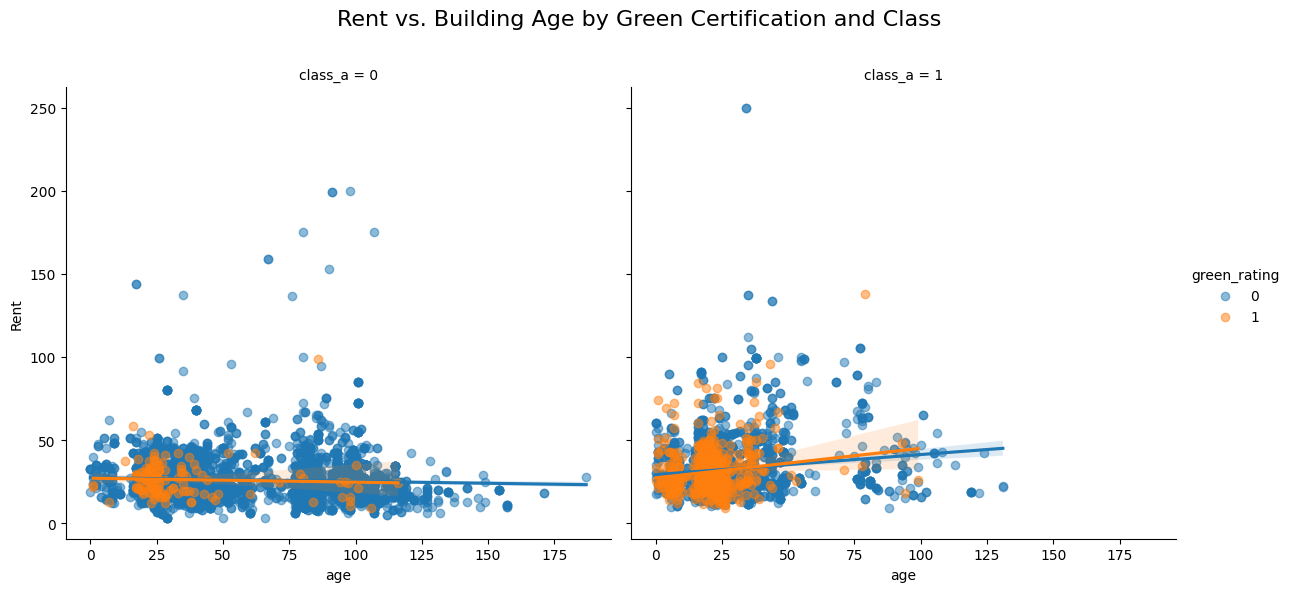

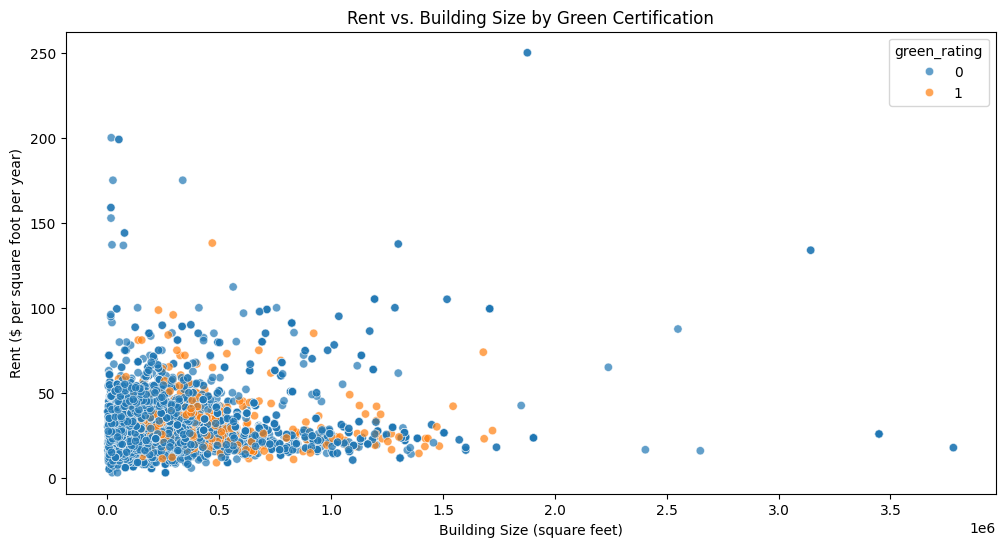

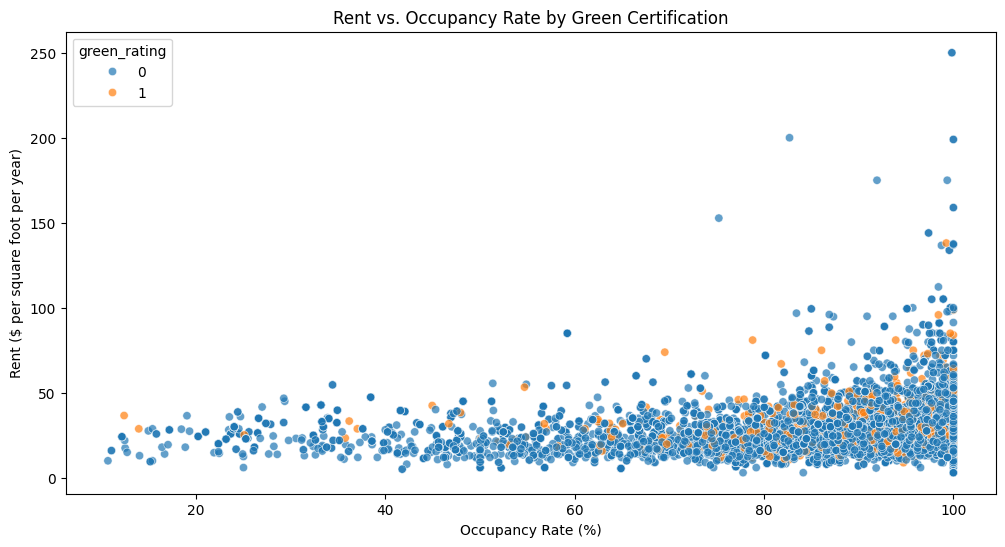

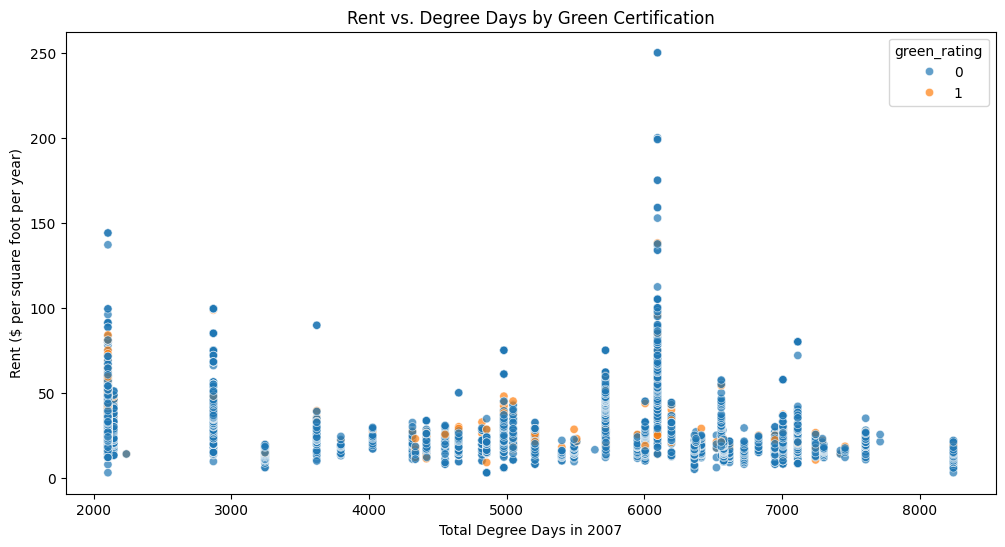

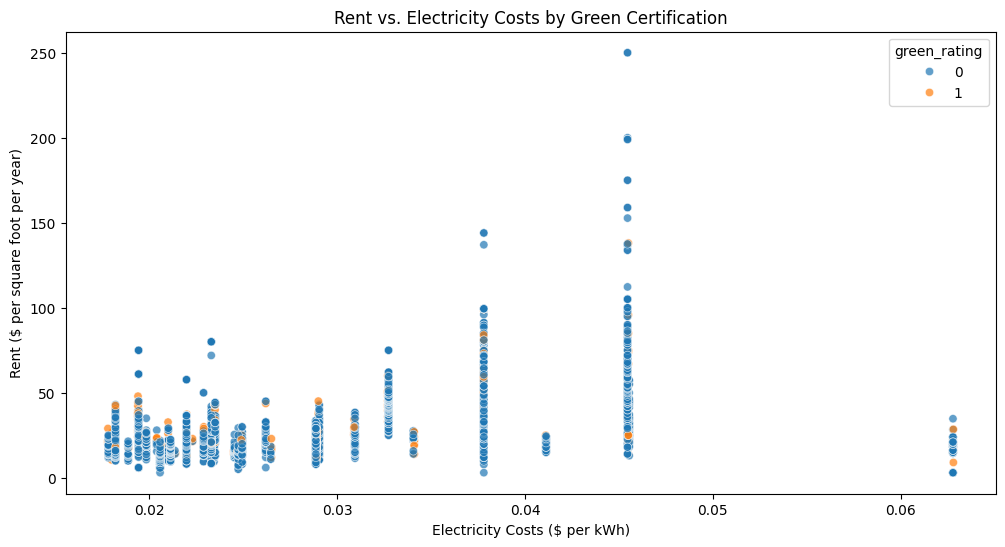

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'greenbuildings.csv'
df = pd.read_csv(file_path)

filtered_df = df[df['leasing_rate'] >= 10]

median_rent_green = filtered_df[filtered_df['green_rating'] == 1]['Rent'].median()
median_rent_non_green = filtered_df[filtered_df['green_rating'] == 0]['Rent'].median()

print("Median Rent for Green Buildings:", median_rent_green)
print("Median Rent for Non-Green Buildings:", median_rent_non_green)

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df[filtered_df['green_rating'] == 1]['Rent'], color='green', label='Green Buildings', kde=True)
sns.histplot(filtered_df[filtered_df['green_rating'] == 0]['Rent'], color='blue', label='Non-Green Buildings', kde=True)
plt.xlabel('Rent ($ per square foot per year)')
plt.ylabel('Density')
plt.title('Rent Distribution: Green vs. Non-Green Buildings')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='class_a', y='Rent', hue='green_rating')
plt.xlabel('Class A (1) vs. Class B (0)')
plt.ylabel('Rent ($ per square foot per year)')
plt.title('Rent Distribution by Building Class and Green Certification')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='age', y='Rent', hue='green_rating', alpha=0.7)
plt.xlabel('Building Age (years)')
plt.ylabel('Rent ($ per square foot per year)')
plt.title('Rent vs. Building Age by Green Certification')
plt.show()

filtered_df['age_group'] = pd.cut(filtered_df['age'], bins=[0, 10, 20, 30, 40, 50, 100], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '50+'])

plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='age_group', y='Rent', hue='green_rating')
plt.xlabel('Building Age Group (years)')
plt.ylabel('Rent ($ per square foot per year)')
plt.title('Rent Distribution by Age Group and Green Certification')
plt.legend(title='Green Certification', loc='upper left', labels=['Non-Green', 'Green'])
plt.show()

sns.lmplot(data=filtered_df, x='age', y='Rent', hue='green_rating', col='class_a', scatter_kws={'alpha':0.5}, height=6, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle('Rent vs. Building Age by Green Certification and Class', fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='size', y='Rent', hue='green_rating', alpha=0.7)
plt.xlabel('Building Size (square feet)')
plt.ylabel('Rent ($ per square foot per year)')
plt.title('Rent vs. Building Size by Green Certification')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='leasing_rate', y='Rent', hue='green_rating', alpha=0.7)
plt.xlabel('Occupancy Rate (%)')
plt.ylabel('Rent ($ per square foot per year)')
plt.title('Rent vs. Occupancy Rate by Green Certification')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='total_dd_07', y='Rent', hue='green_rating', alpha=0.7)
plt.xlabel('Total Degree Days in 2007')
plt.ylabel('Rent ($ per square foot per year)')
plt.title('Rent vs. Degree Days by Green Certification')
plt.show()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='Electricity_Costs', y='Rent', hue='green_rating', alpha=0.7)
plt.xlabel('Electricity Costs ($ per kWh)')
plt.ylabel('Rent ($ per square foot per year)')
plt.title('Rent vs. Electricity Costs by Green Certification')
plt.show()

Green-certified buildings command a median rent of 27.60 dollars per square foot per year, compared to 25.03 dollars for non-green buildings, with the premium being most dramatic in newer, Class A properties. Our additional analysis revealed that building age and class were significant confounding variables. It seems that newer buildings and higher-class properties generally command higher rents, regardless of green certification. However, even after accounting for these factors, green-certified buildings consistently showed a slight rent premium. We also chose to analyze variables such as building size, occupancy rates, and regional environmental conditions, but these did not significantly impact the rent differential between green and non-green buildings.

With this, we could conclude that the estimated 7.7-year payback period for the additional costs of green certification is financially justified. Pursuing green certification is recommended for the new building, as it promises not only higher rental income but also long-term benefits. Overall, the staff member has a solid understanding and argument, but we believe there is slightly more to determining the effect of building a green building, such as the age and class of the building they are planning to create.

# Question 4: Visual story telling part 2: Capital Metro data

Check R Code File

# Question 5: Clustering and dimensionality reduction


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.signal import dfreqresp
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [ ]:
wine = pd.read_csv('wine.csv')

features = wine.iloc[:, :-2]
color = wine['color']
quality = wine['quality']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

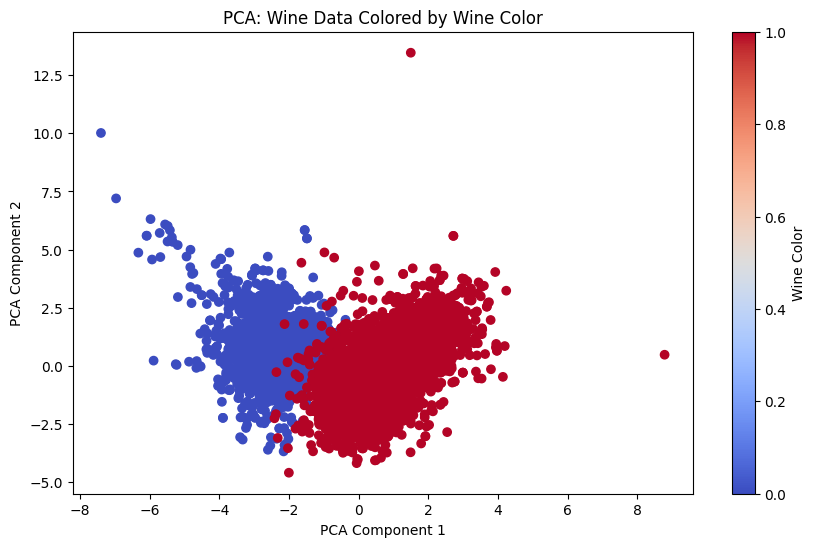

In [ ]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

wine['PCA1'] = pca_result[:, 0]
wine['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=color.map({'red': 0, 'white': 1}), cmap='coolwarm')
plt.colorbar(label='Wine Color')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA: Wine Data Colored by Wine Color')
plt.show()

PCA is effective in distinguishing red from white wines based on their chemical properties. The visualization shows that the dataset has inherent structure related to the wine type, which PCA captures well. However, the presence of some overlap suggests that while PCA is useful, it might not capture all nuances, especially if there are non-linear relationships in the data. Further analysis with t-SNE, which can capture non-linear patterns, would be beneficial for a more detailed examination.

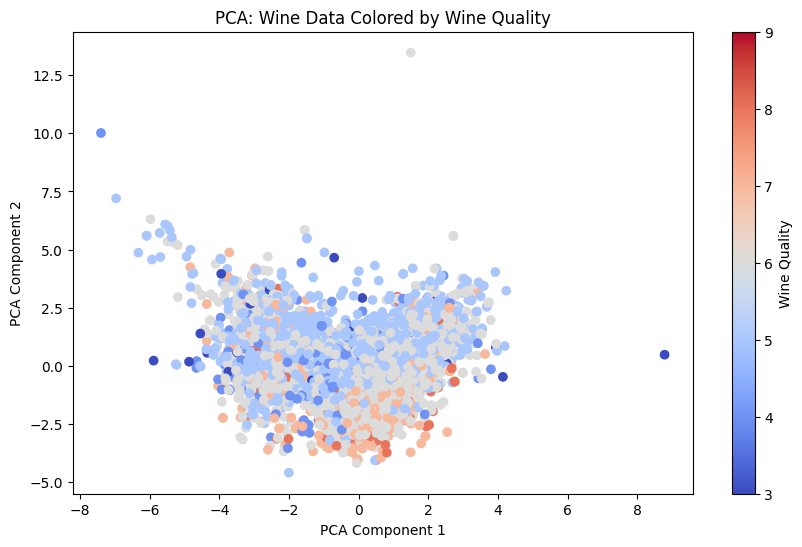

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=quality, cmap='coolwarm')
plt.colorbar(label='Wine Quality')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA: Wine Data Colored by Wine Quality')
plt.show()

PCA does not effectively distinguish between wines of different quality levels based on the chemical properties alone. This indicates that the relationship between chemical properties and wine quality might be more complex, potentially non-linear, and may require different dimensionality reduction techniques, like t-SNE, or other forms of analysis, like supervised learning methods, to better capture the quality distinctions. The absence of clear clustering by quality suggests that unsupervised PCA is not as effective for this specific task.

In [ ]:
#tSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)
tsne_result = tsne.fit_transform(features_scaled)

wine['tSNE1'] = tsne_result[:, 0]
wine['tSNE2'] = tsne_result[:, 1]

tsne_df = pd.DataFrame(data = tsne_result, columns = ['Dim1', 'Dim2'])
tsne_df['Color'] = wine['color'].values
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='Color', hover_data=['Color'])
fig.show()
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.012s...
[t-SNE] Computed neighbors for 6497 samples in 1.264s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.697145
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.131119
[t-SNE] KL divergence after 1000 iterations: 1.414881


This t-SNE plot effectively highlights two distinct clusters within the wine data, which are likely associated with wine color (red vs. white). The clear separation of these clusters underscores the effectiveness of t-SNE in uncovering meaningful groupings based on the chemical properties of the wines. This visualization suggests that t-SNE, paired with K-means clustering, is a strong approach for distinguishing between different types of wines in this dataset.

In [ ]:
tsne_df = pd.DataFrame(data = tsne_result, columns = ['Dim1', 'Dim2'])
tsne_df['Quality'] = wine['quality'].values
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='Quality', hover_data=['Quality'])
fig.show()

This t-SNE plot indicates that wine quality does not form distinct clusters based on the chemical properties alone. Unlike wine color, which t-SNE could distinguish well, wine quality seems to be influenced by more nuanced combinations of features that do not translate easily into separate groups in a 2D t-SNE plot. Therefore, t-SNE might not be the best method for distinguishing wine quality, and other techniques, possibly involving supervised learning, may be needed to predict quality more effectively.

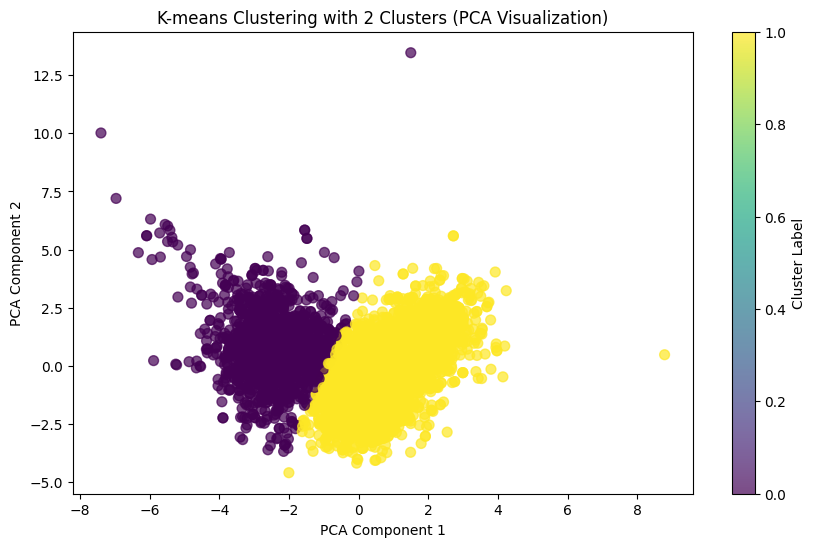

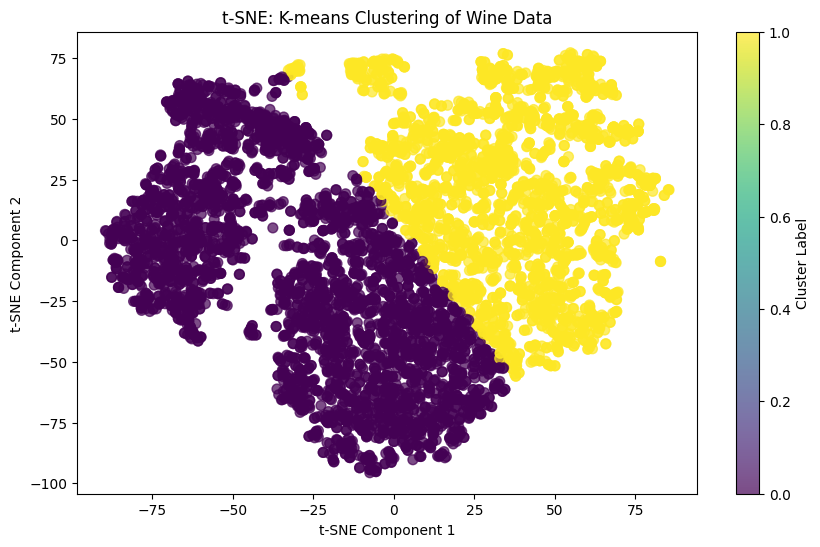

In [ ]:
#KMeans
import seaborn as sns

kmeans_pca = KMeans(n_clusters=2, n_init=25, random_state=42)
wine['Cluster_PCA'] = kmeans_pca.fit_predict(pca_result)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=wine['Cluster_PCA'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering with 2 Clusters (PCA Visualization)')
plt.show()



kmeans_tsne = KMeans(n_clusters=2, n_init=25, random_state=42)
wine['Cluster_tSNE'] = kmeans_tsne.fit_predict(tsne_result)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=wine['Cluster_tSNE'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE: K-means Clustering of Wine Data')
plt.show()


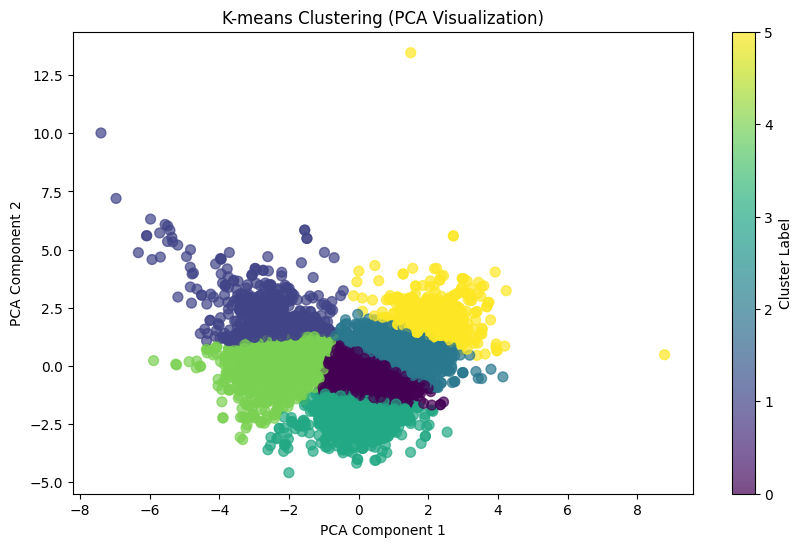

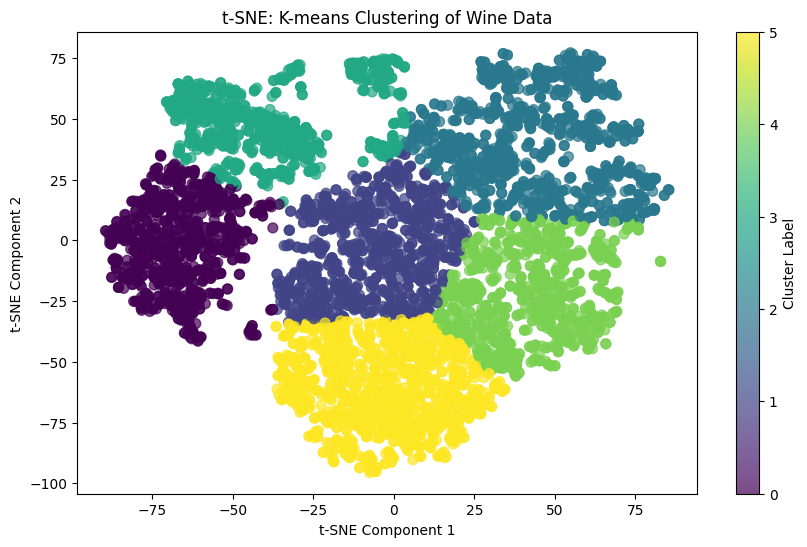

In [ ]:
kmeans = KMeans(n_clusters=6, n_init=25, random_state=42)
wine['Cluster'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=wine['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (PCA Visualization)')
plt.show()

kmeans = KMeans(n_clusters=6, n_init=25, random_state=42)
wine['Cluster'] = kmeans.fit_predict(tsne_result)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=wine['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE: K-means Clustering of Wine Data')
plt.show()

## Conclusion

The t-SNE technique appears to be more effective than PCA in distinguishing between red and white wines based on the chemical properties. The t-SNE plot shows distinct clusters corresponding to wine color, indicating that the chemical properties alone can separate the two types effectively. On the other hand, PCA was less successful in clearly separating the two wine types, suggesting that the non-linear relationships captured by t-SNE are more relevant for this dataset.

Regarding wine quality, neither PCA nor t-SNE was able to effectively cluster wines based on quality ratings. This suggests that the chemical properties alone may not be sufficient to differentiate between higher and lower quality wines. Additional features or more complex models may be required to predict wine quality accurately.

# Question 6: Market segmentation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


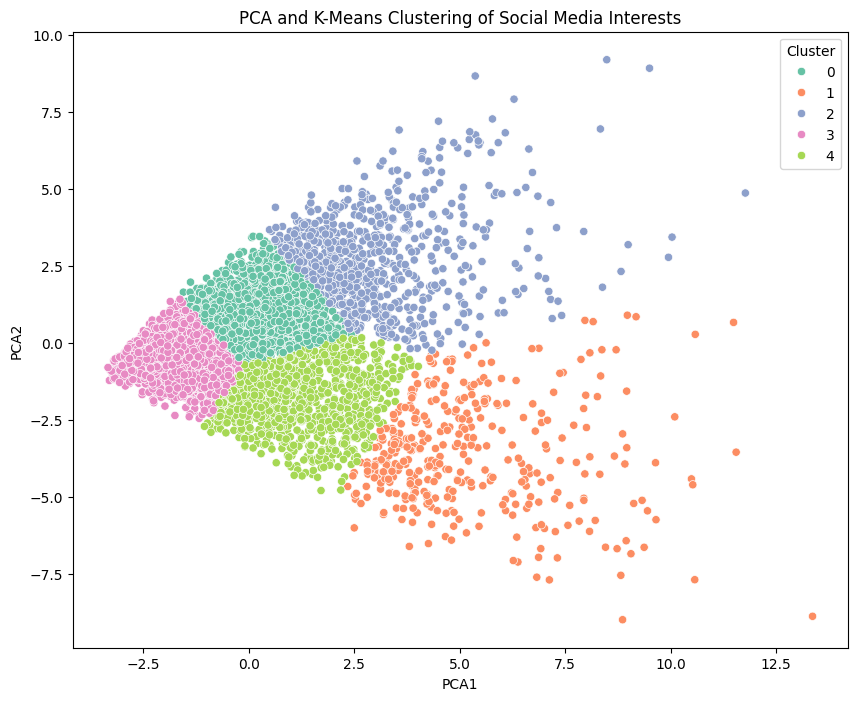

          chatter  current_events    travel  photo_sharing  uncategorized  \
Cluster                                                                     
0        5.566360        1.694262  1.782742       3.517740       0.977223   
1        4.291777        1.880637  2.029178       2.854111       0.819629   
2        7.112207        1.959309  2.521578       6.234279       1.376079   
3        3.191055        1.268957  1.143365       1.523697       0.609301   
4        3.675362        1.526570  1.693720       1.883092       0.671498   

          tv_film  sports_fandom  politics      food    family  ...    beauty  \
Cluster                                                         ...             
0        1.338590       0.974595  1.968025  1.097678  0.658782  ...  0.733246   
1        1.278515       7.450928  2.015915  5.774536  3.045093  ...  1.413793   
2        1.785450       1.499383  2.975339  1.797781  1.103576  ...  2.374846   
3        0.724230       0.758590  1.078495  0.623519  0

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Social Marketing.csv'
data = pd.read_csv(file_path)

data_clean = data.drop(columns=['Unnamed: 0'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

kmeans = KMeans(n_clusters=5, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2')
plt.title('PCA and K-Means Clustering of Social Media Interests')
plt.show()

data['Cluster'] = kmeans.labels_

numeric_columns = data.select_dtypes(include=['number']).columns

cluster_summary = data.groupby('Cluster')[numeric_columns].mean()

print(cluster_summary)

We opted to break potential customers into five segments. Below you can see each of the clusters, how they are important, and what types of people we categorized them to be.

#### **Cluster 0: Lower Activity Moderates**
- **Chatter (3.20)**: This cluster shows moderate social interaction online.
- **Photo Sharing (1.53)**: This group seems to participate in photo sharing but not as much as other clusters.
- **TV/Film (0.73)** and **Sports Fandom (0.75)**: Low interest in traditional media and sports content.
- **Personal Fitness (0.71)**: Some interest in personal fitness content.
  
This cluster represents users who are moderately active online, who might be seen as our "casual" users. They are interested in some content, but not as heavily engaged as other groups.

#### **Cluster 1: Highly Active Influencers**
- **Chatter (7.13)**: The most socially active group, with the highest value for chatter.
- **Photo Sharing (6.26)**: Also an extremely high value for photo sharing.
- **Fashion (3.62)** and **Personal Fitness (3.43)**: Enjoy both fitness and fashion, which might align them more with the "influencer" image.
- **Health Nutrition (6.13)**: High interest in health and nutrition content.
  
This cluster seems to have high  engagement and a strong presence on platforms. These would be the group of heavy social media users/influencers. The customers may be fans of the brand, or influencers themselves.

#### **Cluster 2: Adults**
- **Sports Fandom (7.42)**: This cluster is highly engaged with sports content, making them a prime audience for sports-related campaigns.
- **Parenting (5.17)** and **Family (3.45)**: Also have a strong interest in family and parenting content.
- **Food (5.74)**: Significant interest in food-related content.
- **Religion (6.61)**: High interest in religious content.
  
This cluster seems to be the older, adult focused market, which seem to be interested in sports, family, religion, and food. They may be parents or family-oriented individuals.

#### **Cluster 3: Content Enjoyers / Cinephiles**
- **Chatter (5.57)**: High social activity.
- **Photo Sharing (3.54)**: Significant engagement in sharing visual content.
- **Personal Fitness (2.06)**: Shows an interest in fitness activities.
- **TV/Film (1.34)**: Moderate interest in TV and film content.
  
This cluster represents a segment that is visually-oriented, sharing photos and engaging in fitness and media content. They seem to enjoy all types of digital content, including photos, TV, and film.

#### **Cluster 4: Balanced Consumers**
- **Chatter (3.71)**: Moderate social interaction compared to other clusters.
- **Sports Fandom (3.58)**: Shows interest in sports, though not as much as Cluster 2.
- **Family (2.64)** and **Parenting (2.09)**: Moderate focus on family and parenting topics.
- **Personal Fitness (0.98)**: Some interest in personal fitness.
  
This cluster is well-rounded, and seems to have a moderate interest across a bunch of different content.

# Question 7: The Reuters corpus


Check Python Notebook

# Question 8: Association rule mining


Check R Code File

# Question 9: Image classification with neural networks


Check Python Notebook